<a href="https://colab.research.google.com/github/FKz11/NLP/blob/main/lesson_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson-7

### Библиотеки:

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

### Данные:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Отзывы за лето.csv', encoding="windows-1251", sep=';')
df.head()

,Rating,Content,Date
0,5,It just works!,2017-08-14
1,4,В целом удобноное приложение...из минусов хотя...,2017-08-14
2,5,Отлично все,2017-08-14
3,5,Стал зависать на 1% работы антивируса. Дальше ...,2017-08-14
4,5,"Очень удобно, работает быстро.",2017-08-14


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Rating', axis=1), df['Rating'], random_state=42)
X_train.head()

,Content,Date
6926,Отличное приложение)))),2017-08-04
6735,Олекум,2017-08-04
149,"Хорошее приложение, но «антивирус» очень загру...",2017-08-14
3069,Потянет,2017-08-09
17455,Ужасное приложение положил деньги и они испари...,2017-07-11


In [ ]:
y_train.value_counts()

5    10933
1     1699
4     1627
3      677
2      558
Name: Rating, dtype: int64

In [ ]:
disbalance=(y_train.value_counts().sort_index().max()/y_train.value_counts().sort_index()).values
disbalance

array([ 6.43496174, 19.59318996, 16.14918759,  6.71972956,  1.        ])

### Предобработка

In [ ]:
!pip install -qq stop_words
!pip install -qq pymorphy2

     |████████████████████████████████| 55 kB 2.8 MB/s 
     |████████████████████████████████| 8.2 MB 8.1 MB/s 


In [ ]:
from string import punctuation
from stop_words import get_stop_words
from pymorphy2 import MorphAnalyzer

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
sw = set(get_stop_words("ru"))
exclude = set(punctuation)
morpher = MorphAnalyzer()

def preprocess_text(txt):
    txt = str(txt)
    txt = "".join(c for c in txt if c not in exclude)
    txt = txt.lower()
    txt = [morpher.parse(word)[0].normal_form for word in nltk.word_tokenize(txt) if word not in sw]
    return " ".join(txt)

X_train['Content_preprocess'] = X_train['Content'].apply(preprocess_text)
X_test['Content_preprocess'] = X_test['Content'].apply(preprocess_text)
X_train.head()

,Content,Date,Content_preprocess
6926,Отличное приложение)))),2017-08-04,отличный приложение
6735,Олекум,2017-08-04,олекума
149,"Хорошее приложение, но «антивирус» очень загру...",2017-08-14,хороший приложение « антивирус » загружать сис...
3069,Потянет,2017-08-09,потянуть
17455,Ужасное приложение положил деньги и они испари...,2017-07-11,ужасный приложение положить деньга испариться ...


In [ ]:
from collections import Counter

In [ ]:
corpus = (" ".join(X_train['Content_preprocess'])).split()
corpus_count = Counter(corpus)
corpus_count.most_common(10)

[('приложение', 4849),
 ('удобно', 2495),
 ('работать', 1483),
 ('удобный', 1336),
 ('отлично', 968),
 ('нравиться', 858),
 ('хороший', 770),
 ('отличный', 758),
 ('телефон', 750),
 ('супер', 628)]

In [ ]:
max_words_true = len(corpus_count)
max_words_true

9064

In [ ]:
MAX_WORDS = max_words_true
MAX_WORDS

9064

In [ ]:
vocabulary = {j:i for i, (j, _) in enumerate(corpus_count.most_common()[:MAX_WORDS], 1)}
list(vocabulary.items())[:10]

[('приложение', 1),
 ('удобно', 2),
 ('работать', 3),
 ('удобный', 4),
 ('отлично', 5),
 ('нравиться', 6),
 ('хороший', 7),
 ('отличный', 8),
 ('телефон', 9),
 ('супер', 10)]

In [ ]:
max_len_true = max([len(txt) for txt in X_train['Content_preprocess']])
max_len_true

877

In [ ]:
np.mean([len(txt) for txt in X_train['Content_preprocess']])

40.31754227442881

In [ ]:
MAX_LEN = 50
MAX_LEN

50

In [ ]:
X_train['Content_sequence'] = X_train['Content_preprocess'].apply(lambda text: [vocabulary.get(word, 0) for word in text.split()][:MAX_LEN]+[0]*(MAX_LEN-len(text.split())))
X_test['Content_sequence'] = X_test['Content_preprocess'].apply(lambda text: [vocabulary.get(word, 0) for word in text.split()][:MAX_LEN]+[0]*(MAX_LEN-len(text.split())))
X_train.head()

,Content,Date,Content_preprocess,Content_sequence
6926,Отличное приложение)))),2017-08-04,отличный приложение,"[8, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6735,Олекум,2017-08-04,олекума,"[3391, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
149,"Хорошее приложение, но «антивирус» очень загру...",2017-08-14,хороший приложение « антивирус » загружать сис...,"[7, 1, 1016, 16, 1017, 595, 199, 0, 0, 0, 0, 0..."
3069,Потянет,2017-08-09,потянуть,"[2426, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
17455,Ужасное приложение положил деньги и они испари...,2017-07-11,ужасный приложение положить деньга испариться ...,"[211, 1, 534, 36, 3392, 773, 356, 472, 1633, 8..."


In [ ]:
X_train_array = np.array([[j for j in i] for i in X_train['Content_sequence']])
X_test_array = np.array([[j for j in i] for i in X_test['Content_sequence']])
X_train_array[0][:10]

array([8, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
y_train_array = y_train-1
y_test_array = y_test-1
y_train_array.head()

6926     4
6735     4
149      3
3069     3
17455    3
Name: Rating, dtype: int64

### Модель

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalMaxPooling1D, Dropout, BatchNormalization, Conv1D

In [ ]:
embedding_dim = 300
hidden_dim = 512

In [ ]:
model = Sequential([
    Embedding(MAX_WORDS+1, embedding_dim),
    Conv1D(embedding_dim*2, 3),
    GlobalMaxPooling1D(),
    Dense(hidden_dim, activation='relu'),
    Dense(hidden_dim//2, activation='relu'),

    Dense(units=5, activation='sigmoid')
])

In [ ]:
model.summary()
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              loss_weights=disbalance,
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 300)         2719500   
                                                                 
 conv1d (Conv1D)             (None, None, 600)         540600    
                                                                 
 global_max_pooling1d (Globa  (None, 600)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 512)               307712    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 5)                 1285      
                                                        

In [ ]:
with tf.device("GPU:0"):
  hh = model.fit(X_train_array, y_train_array, validation_data=(X_test_array, y_test_array), epochs=10)

Epoch 1/10
485/485 [==============================] - 17s 9ms/step - loss: 6.9019 - accuracy: 0.7637 - val_loss: 6.4120 - val_accuracy: 0.7762
Epoch 2/10
485/485 [==============================] - 5s 10ms/step - loss: 5.5072 - accuracy: 0.8052 - val_loss: 7.0585 - val_accuracy: 0.7694
Epoch 3/10
485/485 [==============================] - 3s 7ms/step - loss: 4.4287 - accuracy: 0.8454 - val_loss: 7.1560 - val_accuracy: 0.7617
Epoch 4/10
485/485 [==============================] - 4s 8ms/step - loss: 3.4611 - accuracy: 0.8831 - val_loss: 9.1030 - val_accuracy: 0.7398
Epoch 5/10
485/485 [==============================] - 5s 10ms/step - loss: 2.7482 - accuracy: 0.9086 - val_loss: 9.9799 - val_accuracy: 0.7419
Epoch 6/10
485/485 [==============================] - 4s 8ms/step - loss: 2.3473 - accuracy: 0.9237 - val_loss: 10.9870 - val_accuracy: 0.7456
Epoch 7/10
485/485 [==============================] - 4s 9ms/step - loss: 2.0462 - accuracy: 0.9352 - val_loss: 11.9695 - val_accuracy: 0.7425
E

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(np.argmax(model.predict(X_test_array), axis=1), y_test_array))

              precision    recall  f1-score   support

           0       0.51      0.57      0.54       520
           1       0.09      0.12      0.10       153
           2       0.21      0.19      0.20       248
           3       0.17      0.31      0.22       281
           4       0.93      0.86      0.89      3963

    accuracy                           0.74      5165
   macro avg       0.38      0.41      0.39      5165
weighted avg       0.79      0.74      0.76      5165



Видно, что модели сложно предсказывать промежуточные значения, но оно и понятно, так как даже человеку бывает сложно определить разницу между отзывами с оценкой 2-4. Так же видно переобучение. 


## Теперь с предобученными весами для слоя Embedding

Данные были взяты здесь: http://vectors.nlpl.eu/repository/20/220.zip

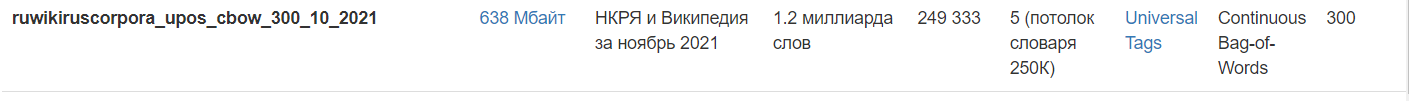

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/model.txt', 'r') as f:
    data = f.read()

In [ ]:
data = [line.split() for line in data.split('\n')]
data[0][:10]

['xxxxxxxx_NUM',
 '-5.775997',
 '-1.4856625',
 '1.4282805',
 '5.107271',
 '0.94274306',
 '1.633782',
 '2.03106',
 '-3.862224',
 '7.6835074']

In [ ]:
from tqdm import tqdm

In [ ]:
word2vec = {}
for word in tqdm(data[:-1]):
  word2vec[word[0].split('_')[0]] = np.array(word[1:]).astype(float)
list(word2vec.items())[0]

100%|██████████| 249333/249333 [00:48<00:00, 5181.44it/s]


('xxxxxxxx',
 array([-5.775997  , -1.4856625 ,  1.4282805 ,  5.107271  ,  0.94274306,
         1.633782  ,  2.03106   , -3.862224  ,  7.6835074 , -2.452829  ,
        -1.1344614 , -2.9715064 , -1.1943372 ,  0.60422194, -3.600998  ,
        -3.7676146 ,  2.9703367 , -1.9335803 ,  0.7025744 , -4.9147015 ,
         6.821634  ,  0.5059877 ,  0.41100878,  3.0133476 , -0.8700064 ,
        -2.0856552 ,  6.383491  , -2.8943033 ,  4.720144  ,  3.638207  ,
        -6.6306615 ,  1.812578  , -1.9579812 , -7.607699  , -2.3855708 ,
         1.3066907 ,  4.9606256 , -3.437113  , -0.3333033 ,  4.795064  ,
        -4.8095465 ,  2.3499146 ,  4.8853273 ,  4.687315  ,  0.8327079 ,
         2.8774421 , -4.291407  , -5.108345  , -2.148041  , -4.7741423 ,
         1.0339713 , -1.7400155 ,  0.31231344, -6.4322696 ,  1.6250391 ,
         0.72703356, -0.49629834, -3.1099138 , -2.9617152 ,  2.7351406 ,
        -0.5895083 ,  0.42098752,  3.5558884 , -1.084687  ,  0.96802926,
        -0.8950529 , -1.6569282 ,  4.6

In [ ]:
word2num = {j:i for i,j in enumerate(word2vec.keys(), 1)}
list(word2num.items())[:10]

[('xxxxxxxx', 1),
 ('год', 2),
 ('xxxxxx', 3),
 ('xxxxxxx', 4),
 ('первый', 5),
 ('время', 6),
 ('человек', 7),
 ('introduction', 8),
 ('один', 9),
 ('район', 10)]

In [ ]:
MAX_WORDS = len(word2num)
MAX_WORDS

205707

In [ ]:
X_train['Content_sequence_word2num'] = X_train['Content_preprocess'].apply(lambda text: [word2num.get(word, 0) for word in text.split()][:MAX_LEN]+[0]*(MAX_LEN-len(text.split())))
X_test['Content_sequence_word2num'] = X_test['Content_preprocess'].apply(lambda text: [word2num.get(word, 0) for word in text.split()][:MAX_LEN]+[0]*(MAX_LEN-len(text.split())))
X_train.head()

,Content,Date,Content_preprocess,Content_sequence,Content_sequence_word2num
6926,Отличное приложение)))),2017-08-04,отличный приложение,"[8, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2838, 2234, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6735,Олекум,2017-08-04,олекума,"[3391, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
149,"Хорошее приложение, но «антивирус» очень загру...",2017-08-14,хороший приложение « антивирус » загружать сис...,"[7, 1, 1016, 16, 1017, 595, 199, 0, 0, 0, 0, 0...","[300, 2234, 0, 48444, 0, 13194, 91, 0, 0, 0, 0..."
3069,Потянет,2017-08-09,потянуть,"[2426, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[10103, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
17455,Ужасное приложение положил деньги и они испари...,2017-07-11,ужасный приложение положить деньга испариться ...,"[211, 1, 534, 36, 3392, 773, 356, 472, 1633, 8...","[3257, 2234, 3986, 98577, 36006, 12393, 1949, ..."


In [ ]:
num2vec = {word2num[i]:j for i,j in word2vec.items()}

Пускай там где нету слова будет нулевой вектор, это будет логично.

In [ ]:
embedding_dim = len(list(word2vec.items())[0][1])
embedding_dim

300

In [ ]:
zero_vec = [0]*embedding_dim

In [ ]:
num2vec[0] = zero_vec

In [ ]:
embedding_start_weights = np.array([j for i,j in sorted(num2vec.items(), key=lambda x: x[0])])
embedding_start_weights.shape

(205708, 300)

In [ ]:
X_train_array = np.array([[j for j in i] for i in X_train['Content_sequence_word2num']])
X_test_array = np.array([[j for j in i] for i in X_test['Content_sequence_word2num']])
X_train_array.shape

(15494, 50)

Здесь заканчивается ОЗУ, поэтому сохраним данные в облако и перезапустим сеанс

In [ ]:
np.save('/content/drive/MyDrive/Colab Notebooks/embedding_start_weights.npy', embedding_start_weights)
np.save('/content/drive/MyDrive/Colab Notebooks/X_train_array.npy', X_train_array)
np.save('/content/drive/MyDrive/Colab Notebooks/X_test_array.npy', X_test_array)
np.save('/content/drive/MyDrive/Colab Notebooks/y_train_array.npy', y_train_array)
np.save('/content/drive/MyDrive/Colab Notebooks/y_test_array.npy', y_test_array)
np.save('/content/drive/MyDrive/Colab Notebooks/disbalance.npy', disbalance)
np.save('/content/drive/MyDrive/Colab Notebooks/MAX_WORDS.npy', MAX_WORDS)
np.save('/content/drive/MyDrive/Colab Notebooks/MAX_LEN.npy', MAX_LEN)

*** checkpoint ***

In [ ]:
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
embedding_start_weights = np.load('/content/drive/MyDrive/Colab Notebooks/embedding_start_weights.npy')
X_train_array = np.load('/content/drive/MyDrive/Colab Notebooks/X_train_array.npy')
X_test_array = np.load('/content/drive/MyDrive/Colab Notebooks/X_test_array.npy')
y_train_array = np.load('/content/drive/MyDrive/Colab Notebooks/y_train_array.npy')
y_test_array = np.load('/content/drive/MyDrive/Colab Notebooks/y_test_array.npy')
disbalance = np.load('/content/drive/MyDrive/Colab Notebooks/disbalance.npy')
MAX_WORDS = np.load('/content/drive/MyDrive/Colab Notebooks/MAX_WORDS.npy')
MAX_LEN = np.load('/content/drive/MyDrive/Colab Notebooks/MAX_LEN.npy')
embedding_start_weights.shape

(205708, 300)

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalMaxPooling1D, Dropout, BatchNormalization, Conv1D

In [ ]:
embedding_dim = 300
hidden_dim = 512

In [ ]:
model = Sequential([
    Embedding(MAX_WORDS+1, embedding_dim),
    Conv1D(embedding_dim*2, 3),
    GlobalMaxPooling1D(),
    Dense(hidden_dim, activation='relu'),
    Dense(hidden_dim//2, activation='relu'),

    Dense(units=5, activation='sigmoid')
])

In [ ]:
model.layers[0].get_weights()[0].shape

(205708, 300)

In [ ]:
embedding_start_weights.shape

(205708, 300)

Инициализируем веса:

In [ ]:
model.layers[0].set_weights([embedding_start_weights])

In [ ]:
model.build((None, MAX_LEN, embedding_dim))
model.summary()
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              loss_weights=disbalance,
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 300)         61712400  
                                                                 
 conv1d_3 (Conv1D)           (None, None, 600)         540600    
                                                                 
 global_max_pooling1d_3 (Glo  (None, 600)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_9 (Dense)             (None, 512)               307712    
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dense_11 (Dense)            (None, 5)                 1285      
                                                      

In [ ]:
with tf.device("GPU:0"):
  hh = model.fit(X_train_array, y_train_array, validation_data=(X_test_array, y_test_array), epochs=10)

Epoch 1/10
485/485 [==============================] - 20s 40ms/step - loss: 7.3737 - accuracy: 0.7535 - val_loss: 6.6875 - val_accuracy: 0.7673
Epoch 2/10
485/485 [==============================] - 19s 40ms/step - loss: 6.1390 - accuracy: 0.7859 - val_loss: 6.5515 - val_accuracy: 0.7708
Epoch 3/10
485/485 [==============================] - 19s 40ms/step - loss: 5.5060 - accuracy: 0.8047 - val_loss: 6.7177 - val_accuracy: 0.7652
Epoch 4/10
485/485 [==============================] - 19s 40ms/step - loss: 4.9353 - accuracy: 0.8275 - val_loss: 6.9085 - val_accuracy: 0.7688
Epoch 5/10
485/485 [==============================] - 19s 40ms/step - loss: 4.2300 - accuracy: 0.8570 - val_loss: 8.8798 - val_accuracy: 0.7624
Epoch 6/10
485/485 [==============================] - 19s 39ms/step - loss: 3.6550 - accuracy: 0.8772 - val_loss: 9.5217 - val_accuracy: 0.7473
Epoch 7/10
485/485 [==============================] - 19s 40ms/step - loss: 3.1023 - accuracy: 0.8989 - val_loss: 10.7837 - val_accuracy

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(np.argmax(model.predict(X_test_array), axis=1), y_test_array))

              precision    recall  f1-score   support

           0       0.55      0.56      0.56       572
           1       0.11      0.14      0.12       148
           2       0.15      0.17      0.16       203
           3       0.19      0.27      0.22       350
           4       0.93      0.87      0.90      3892

    accuracy                           0.75      5165
   macro avg       0.38      0.40      0.39      5165
weighted avg       0.78      0.75      0.76      5165



### Теперь попробуем без дообучения, заморозим слой Embedding

In [ ]:
model = Sequential([
    Embedding(MAX_WORDS+1, embedding_dim),
    Conv1D(embedding_dim*2, 3),
    GlobalMaxPooling1D(),
    Dense(hidden_dim, activation='relu'),
    Dense(hidden_dim//2, activation='relu'),

    Dense(units=5, activation='sigmoid')
])

Инициализируем веса:

In [ ]:
model.layers[0].set_weights([embedding_start_weights])

Заморозим веса:

In [ ]:
model.layers[0].trainable=False

In [ ]:
model.build((None, MAX_LEN, embedding_dim))
model.summary()
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              loss_weights=disbalance,
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 300)         61712400  
                                                                 
 conv1d_4 (Conv1D)           (None, None, 600)         540600    
                                                                 
 global_max_pooling1d_4 (Glo  (None, 600)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_12 (Dense)            (None, 512)               307712    
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 dense_14 (Dense)            (None, 5)                 1285      
                                                      

In [ ]:
with tf.device("GPU:0"):
  hh = model.fit(X_train_array, y_train_array, validation_data=(X_test_array, y_test_array), epochs=10)

Epoch 1/10
485/485 [==============================] - 3s 6ms/step - loss: 7.3771 - accuracy: 0.7486 - val_loss: 6.7346 - val_accuracy: 0.7648
Epoch 2/10
485/485 [==============================] - 3s 6ms/step - loss: 6.3066 - accuracy: 0.7792 - val_loss: 6.8795 - val_accuracy: 0.7729
Epoch 3/10
485/485 [==============================] - 2s 5ms/step - loss: 5.8015 - accuracy: 0.7935 - val_loss: 6.8772 - val_accuracy: 0.7742
Epoch 4/10
485/485 [==============================] - 2s 5ms/step - loss: 5.2623 - accuracy: 0.8167 - val_loss: 7.2351 - val_accuracy: 0.7655
Epoch 5/10
485/485 [==============================] - 3s 5ms/step - loss: 4.6633 - accuracy: 0.8367 - val_loss: 7.4507 - val_accuracy: 0.7574
Epoch 6/10
485/485 [==============================] - 3s 6ms/step - loss: 4.1492 - accuracy: 0.8598 - val_loss: 8.0517 - val_accuracy: 0.7549
Epoch 7/10
485/485 [==============================] - 2s 5ms/step - loss: 3.5530 - accuracy: 0.8819 - val_loss: 9.0171 - val_accuracy: 0.7526
Epoch 

In [ ]:
print(classification_report(np.argmax(model.predict(X_test_array), axis=1), y_test_array))

              precision    recall  f1-score   support

           0       0.66      0.51      0.57       755
           1       0.09      0.15      0.12       120
           2       0.08      0.15      0.10       130
           3       0.15      0.30      0.20       258
           4       0.93      0.87      0.90      3902

    accuracy                           0.75      5165
   macro avg       0.38      0.39      0.38      5165
weighted avg       0.81      0.75      0.78      5165



### Посмотрим как будет обучаться модель со случайными весами Embedding слоя, при этом мы его заморозим, по идеи метрики должны быть гораздо хуже

In [ ]:
model = Sequential([
    Embedding(MAX_WORDS+1, embedding_dim),
    Conv1D(embedding_dim*2, 3),
    GlobalMaxPooling1D(),
    Dense(hidden_dim, activation='relu'),
    Dense(hidden_dim//2, activation='relu'),

    Dense(units=5, activation='sigmoid')
])

Заморозим веса:

In [ ]:
model.layers[0].trainable=False

In [ ]:
model.build((None, MAX_LEN, embedding_dim))
model.summary()
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              loss_weights=disbalance,
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 300)         61712400  
                                                                 
 conv1d_5 (Conv1D)           (None, None, 600)         540600    
                                                                 
 global_max_pooling1d_5 (Glo  (None, 600)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_15 (Dense)            (None, 512)               307712    
                                                                 
 dense_16 (Dense)            (None, 256)               131328    
                                                                 
 dense_17 (Dense)            (None, 5)                 1285      
                                                      

In [ ]:
with tf.device("GPU:0"):
  hh = model.fit(X_train_array, y_train_array, validation_data=(X_test_array, y_test_array), epochs=10)

Epoch 1/10
485/485 [==============================] - 3s 6ms/step - loss: 7.3157 - accuracy: 0.7498 - val_loss: 6.8913 - val_accuracy: 0.7615
Epoch 2/10
485/485 [==============================] - 2s 5ms/step - loss: 6.3895 - accuracy: 0.7824 - val_loss: 6.6750 - val_accuracy: 0.7652
Epoch 3/10
485/485 [==============================] - 2s 5ms/step - loss: 5.6424 - accuracy: 0.8082 - val_loss: 6.9688 - val_accuracy: 0.7570
Epoch 4/10
485/485 [==============================] - 3s 6ms/step - loss: 4.7242 - accuracy: 0.8419 - val_loss: 7.4695 - val_accuracy: 0.7595
Epoch 5/10
485/485 [==============================] - 3s 6ms/step - loss: 3.8484 - accuracy: 0.8716 - val_loss: 8.7631 - val_accuracy: 0.7351
Epoch 6/10
485/485 [==============================] - 3s 6ms/step - loss: 3.3967 - accuracy: 0.8906 - val_loss: 9.4751 - val_accuracy: 0.7444
Epoch 7/10
485/485 [==============================] - 2s 5ms/step - loss: 2.9428 - accuracy: 0.9071 - val_loss: 12.4322 - val_accuracy: 0.7607
Epoch

In [ ]:
print(classification_report(np.argmax(model.predict(X_test_array), axis=1), y_test_array))

              precision    recall  f1-score   support

           0       0.50      0.55      0.52       532
           1       0.14      0.18      0.15       147
           2       0.19      0.20      0.19       224
           3       0.15      0.27      0.19       282
           4       0.94      0.86      0.90      3980

    accuracy                           0.75      5165
   macro avg       0.38      0.41      0.39      5165
weighted avg       0.79      0.75      0.77      5165



Метрики остались такими же. Даже со случайными векторами сетка может обучаться до 0.92 accuracy на train.

### Вывод:

Все результаты оказались приблизительно одинаково плохими, возможно стоит обратить внимание на сами данные и как делается их предобработка. Так же можно попробывать dropout и batchnorm чтоби снизить явное переобучение. Возможно стоит поискать word2vec веса получше. 

Стоит отметить, что метрика на train при обучении Embedding без предобученных весов оказалась выше. Так как модель начала быстро затачиваться под конкретные слова и набирать большую метрику.

Так как в последнем эксперименте сетка смогла обучиться даже на случайных векторах (хотя метрика на train меньше, чем когда мы обучали слой Embedding), то очевидно, что проблема в переобучении. Поэтому есть веский повод попробывать заменить некоторые слова на сущности/тэги, которые так кстати давались вместе с word2vec данными. Тогда переобучение должно будет уменьшиться.